<a href="https://colab.research.google.com/github/leptoquark/MapStore/blob/master/classificatore_classi_incasso_tot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connessione al database e casting delle date

In [ ]:
!pip install psycopg2-binary

from google.colab import userdata
import psycopg2
import pandas as pd

DATE2STR = psycopg2.extensions.new_type(
    psycopg2.extensions.DATE.values,
    'DATE2STR',
    lambda value, curs:
        str(value) if value is not None else None)

psycopg2.extensions.register_type(DATE2STR)

try:
    connection = psycopg2.connect(
        host=userdata.get('host'),
        port=userdata.get('port'),
        database=userdata.get('database'),
        user=userdata.get('user'),
        password=userdata.get('password')
    )
    cursor = connection.cursor()
    print("Connessione stabilita correttamente")
except Exception as e:
    print("Errore nella connessione alla base di dati:", e)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.5 MB/s eta 0:00:00
Connessione stabilita correttamente


# Mount Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Query di lettura su tutte le righe del database

In [ ]:
query = "SELECT * FROM cgmanager_ai.pratiche"

cursor.execute(query);

num_fields = len(cursor.description)
field_names = [i[0] for i in cursor.description]

rows = cursor.fetchall()

df = pd.DataFrame(rows,columns=field_names)

# Tipizzazione degli attributi provenienti dal dataset

In [ ]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

pd.set_option('display.max_columns', None)

# Trasformazione degli attributi in categoria

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['azienda_codice_cat'] = label_encoder.fit_transform(df['azienda_codice'])
df['committente_codice_cat'] = label_encoder.fit_transform(df['committente_codice'])
df['tp_profilo_cat'] = label_encoder.fit_transform(df['tp_profilo'])
df['tp_intervento_cat'] = label_encoder.fit_transform(df['tp_intervento'])
df['prodotto_cat'] = label_encoder.fit_transform(df['prodotto'])
df['livello_cat'] = label_encoder.fit_transform(df['livello'])
df['tipo_soggetto_cat'] = label_encoder.fit_transform(df['tipo_soggetto'])
df['sesso_cat'] = label_encoder.fit_transform(df['sesso'])
df['tipo_societa_cat'] = label_encoder.fit_transform(df['tipo_societa'])
df['profilo_esattore_cat'] = label_encoder.fit_transform(df['profilo_esattore'])

# Dati Prelevati da Open Data Nazionali
df['codice_istat_cat'] = label_encoder.fit_transform(df['codice_istat'])
df['codice_comune_cat'] = label_encoder.fit_transform(df['codice_comune'])

# Trasformazione degli attributi in date

df['data_affido'] = pd.to_datetime(df.data_affido)
df['data_ultimo_incasso'] = pd.to_datetime(df.data_ultimo_incasso, errors='coerce')
df['data_ultima_nota'] = pd.to_datetime(df.data_ultima_nota, errors='coerce')
df['scadenza_mandato'] = pd.to_datetime(df.scadenza_mandato, errors='coerce')
df['dataaffidoesattore'] = pd.to_datetime(df.dataaffidoesattore, errors='coerce')
df['datascadaffesat'] = pd.to_datetime(df.datascadaffesat, errors='coerce')

df['data_nascita'] = pd.to_datetime(df.data_nascita, errors='coerce')

df.info()

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469454 entries, 0 to 469453
Data columns (total 72 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   azienda_codice          469454 non-null  object        
 1   id_pratica              469454 non-null  int64         
 2   committente_codice      469454 non-null  object        
 3   tp_profilo              469454 non-null  object        
 4   tp_intervento_cod       450372 non-null  object        
 5   tp_intervento           450372 non-null  object        
 6   prodotto_cod            290051 non-null  object        
 7   prodotto                290051 non-null  object        
 8   livello_cod             417096 non-null  object        
 9   livello                 417096 non-null  object        
 10  tipo_soggetto           457949 non-null  object        
 11  sesso                   443634 non-null  object        
 12  tipo_societa            457949

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune,numero_contribuenti,reddito_medio,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,codice_istat_cat,codice_comune_cat
0,Cliente 2,8747851,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,F,Privato,1959-11-04,MILANO (MI),None,SANREMO,IM,LIGURIA,None,2022-08-05,2022-08-26,5632993,None,None,None,1,282.75,282.75,0.01,28.28,0.0,0.0,311.04,282.75,311.04,NaN,282.75,0.01,28.28,0.0,311.04,1.0,Utente 140,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-08,2022-08-25 12:30:44.651082,2,0,1,2,6,000000,Z907,NaN,NaN,1,12,1,2,16,55,0,0,4,4,0,3761
1,Cliente 2,8748092,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1949-04-17,LENO (BS),None,LAVENO-MOMBELLO,VA,LOMBARDIA,None,2022-08-05,2022-08-26,5000158287,None,None,None,1,342.99,342.99,0.01,30.00,0.0,0.0,373.00,342.99,373.00,NaN,342.99,0.00,0.00,0.0,342.99,1.0,Utente 97,2022-08-05,2022-08-26,PHONE COLLECTION,True,False,2022-08-22,2022-08-26 12:50:23.161185,3,0,0,0,4,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761
2,Cliente 2,8748085,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,M,Privato,1972-09-22,CARBONIA (CI),09017,SANT'ANTIOCO,CI,SARDEGNA,None,2022-08-05,2022-08-26,5835641,None,None,None,1,181.56,181.56,0.06,18.16,0.0,0.0,199.78,181.56,199.78,NaN,181.56,0.06,0.00,0.0,181.62,1.0,Utente 127,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-26,2022-08-26 15:06:18.322469,4,0,1,2,8,092063,I294,6964.0,16520.64900,1,12,1,2,16,56,0,1,4,4,3339,3075
3,Cliente 2,8733889,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,M,Privato,1956-11-04,FRIGNANO (CE),None,CASTELFRANCO PIANDISCO',AR,TOSCANA,None,2022-07-16,2022-08-06,5722432,None,None,None,1,220.50,220.50,0.05,22.06,0.0,0.0,242.61,220.50,242.61,NaN,0.00,0.00,0.00,0.0,0.00,0.0,Utente 66,2022-07-18,2022-08-06,PHONE COLLECTION,True,False,NaT,2022-08-05 15:05:20.455069,2,0,0,0,7,000000,Z907,NaN,NaN,1,12,1,2,16,55,0,1,4,4,0,3761
4,Cliente 2,8735618,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1997-11-18,BUSTO ARSIZIO (VA),None,SANT'ANDREA APOSTOLO DELLO IONIO,CZ,CALABRIA,None,2022-07-19,2022-08-09,5761804,None,None,None,1,198.66,198.66,2.39,20.11,0.0,0.0,221.16,198.66,221.16,NaN,198.66,0.00,0.00,0.0,198.66,1.0,Utente 46,2022-07-19,2022-08-09,PHONE COLLECTION,True,False,2022-08-01,2022-09-09 11:02:43.597660,2,0,0,0,10,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469449,Cliente 2,8738650,Committente 26,Finanziario,PRE,PRE Contenzioso,None,None,240,240,Persona Fisica,M,Privato,1981-04-12,CASSINO (FR),44042,CENTO FE,,---,None,2022-07-28,2022-08-20,CO 5556005,None,None,None,1,381.50,763.00,4.77,30.00,0.0,381.5,797.77,381.50,798.21,NaN,381.50,0.00,0.00,0.0,381.50,1.0,Utente 140,2022-07-29,2022-08-20,PH

# Calcolo i giorni di differenza tra ultimo incasso e affido per verificare i tempi di recupero in giorni con classificazione

In [ ]:
import numpy as np

df['diff_days'] = (df['data_ultimo_incasso'] - df['data_affido']) / np.timedelta64(1, 'D')

df_filtered = df.loc[~df.diff_days.isnull()]
df_filtered = df_filtered.query('diff_days >= 0')

df_filtered = df_filtered.loc[(df_filtered['data_ultimo_incasso'] < '2024-01-01')]

df_filtered[['diff_days','data_ultimo_incasso','data_affido']]

,diff_days,data_ultimo_incasso,data_affido
0,3.0,2022-08-08,2022-08-05
1,17.0,2022-08-22,2022-08-05
2,21.0,2022-08-26,2022-08-05
4,13.0,2022-08-01,2022-07-19
7,2.0,2022-08-08,2022-08-06
...,...,...,...
469443,9.0,2022-08-01,2022-07-23
469445,3.0,2022-07-26,2022-07-23
469449,5.0,2022-08-02,2022-07-28
469451,1.0,2022-08-02,2022-08-01


# Aggiunta di attriburi arrificiali

## Calcolo età

In [ ]:
from datetime import datetime
import numpy as np

# Funzione per calcolare l'età
def calcola_eta(data_nascita):
    oggi = datetime.now()
    eta = oggi.year - data_nascita.year - ((oggi.month, oggi.day) < (data_nascita.month, data_nascita.day))
    return eta

# Applichiamo la funzione a ogni riga del DataFrame e creiamo una nuova colonna 'Età'
df_filtered['età'] = df_filtered['data_nascita'].apply(calcola_eta)
df_filtered['età'] = df_filtered['età'].replace([np.inf, -np.inf], np.nan).fillna(0)
df_filtered['età'] = df_filtered['età'].astype(int)

print(df_filtered[['data_nascita','età']])

       data_nascita  età
0        1959-11-04   64
1        1949-04-17   75
2        1972-09-22   51
4        1997-11-18   26
7        1976-11-02   47
...             ...  ...
469443   1988-06-23   36
469445   1959-07-13   65
469449   1981-04-12   43
469451   1967-01-16   57
469452   1995-01-22   29

[221264 rows x 2 columns]


## Calcolo attributo emigrato

In [ ]:
df_filtered[['città_nascita', 'provincia_nascita']] = df_filtered['luogo_nascita'].str.extract(r'^(.*) \((.*)\)$')
df_filtered['emigrato'] = df_filtered['provincia'] != df_filtered['provincia_nascita']

df_filtered

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune,numero_contribuenti,reddito_medio,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,codice_istat_cat,codice_comune_cat,diff_days,età,città_nascita,provincia_nascita,emigrato
0,Cliente 2,8747851,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,F,Privato,1959-11-04,MILANO (MI),None,SANREMO,IM,LIGURIA,None,2022-08-05,2022-08-26,5632993,None,None,None,1,282.75,282.75,0.01,28.28,0.0,0.0,311.04,282.75,311.04,NaN,282.75,0.01,28.28,0.0,311.04,1.0,Utente 140,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-08,2022-08-25 12:30:44.651082,2,0,1,2,6,000000,Z907,NaN,NaN,1,12,1,2,16,55,0,0,4,4,0,3761,3.0,64,MILANO,MI,True
1,Cliente 2,8748092,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1949-04-17,LENO (BS),None,LAVENO-MOMBELLO,VA,LOMBARDIA,None,2022-08-05,2022-08-26,5000158287,None,None,None,1,342.99,342.99,0.01,30.00,0.0,0.0,373.00,342.99,373.00,NaN,342.99,0.00,0.00,0.0,342.99,1.0,Utente 97,2022-08-05,2022-08-26,PHONE COLLECTION,True,False,2022-08-22,2022-08-26 12:50:23.161185,3,0,0,0,4,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761,17.0,75,LENO,BS,True
2,Cliente 2,8748085,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,M,Privato,1972-09-22,CARBONIA (CI),09017,SANT'ANTIOCO,CI,SARDEGNA,None,2022-08-05,2022-08-26,5835641,None,None,None,1,181.56,181.56,0.06,18.16,0.0,0.0,199.78,181.56,199.78,NaN,181.56,0.06,0.00,0.0,181.62,1.0,Utente 127,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-26,2022-08-26 15:06:18.322469,4,0,1,2,8,092063,I294,6964.0,16520.64900,1,12,1,2,16,56,0,1,4,4,3339,3075,21.0,51,CARBONIA,CI,False
4,Cliente 2,8735618,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1997-11-18,BUSTO ARSIZIO (VA),None,SANT'ANDREA APOSTOLO DELLO IONIO,CZ,CALABRIA,None,2022-07-19,2022-08-09,5761804,None,None,None,1,198.66,198.66,2.39,20.11,0.0,0.0,221.16,198.66,221.16,NaN,198.66,0.00,0.00,0.0,198.66,1.0,Utente 46,2022-07-19,2022-08-09,PHONE COLLECTION,True,False,2022-08-01,2022-09-09 11:02:43.597660,2,0,0,0,10,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761,13.0,26,BUSTO ARSIZIO,VA,True
7,Cliente 2,8749552,Committente 26,Finanziario,PRE,PRE Contenzioso,None,None,230,230,Persona Fisica,M,Privato,1976-11-02,GELA (CL),20018,SEDRIANO MI,,---,None,2022-08-06,2022-08-29,CO 5874331,None,None,None,1,238.97,238.97,0.00,23.89,0.0,0.0,262.86,238.97,262.86,NaN,238.97,0.00,23.89,0.0,262.86,1.0,Utente 37,2022-08-08,2022-08-29,PHONE COLLECTION,True,False,2022-08-08,2022-08-29 15:41:40.800980,2,0,0,1,3,015204,I566,9212.0,23769.38594,1,12,1,4,16,3,0,1,4,4,650,3188,2.0,47,GELA,CL,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469443,Cliente 2,8738031,Committente 26,Finanziario,PRE,PRE Contenzioso,None,None,240,240,Persona Fisica,M,Privato,1988-06-23,NAPOLI 

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import time

# Lista delle province italiane
province = [
    'Agrigento', 'Alessandria', 'Ancona', 'Aosta', 'Arezzo', 'Ascoli Piceno', 'Asti', 'Avellino', 'Bari',
    'Barletta-Andria-Trani', 'Belluno', 'Benevento', 'Bergamo', 'Biella', 'Bologna', 'Bolzano', 'Brescia',
    'Brindisi', 'Cagliari', 'Caltanissetta', 'Campobasso', 'Caserta', 'Catania', 'Catanzaro', 'Chieti', 'Como',
    'Cosenza', 'Cremona', 'Crotone', 'Cuneo', 'Enna', 'Fermo', 'Ferrara', 'Firenze', 'Foggia', 'Forlì-Cesena',
    'Frosinone', 'Genova', 'Gorizia', 'Grosseto', 'Imperia', 'Isernia', 'La Spezia', 'L\'Aquila', 'Latina',
    'Lecce', 'Lecco', 'Livorno', 'Lodi', 'Lucca', 'Macerata', 'Mantova', 'Massa-Carrara', 'Matera', 'Messina',
    'Milano', 'Modena', 'Monza e della Brianza', 'Napoli', 'Novara', 'Nuoro', 'Oristano', 'Padova', 'Palermo',
    'Parma', 'Pavia', 'Perugia', 'Pesaro e Urbino', 'Pescara', 'Piacenza', 'Pisa', 'Pistoia', 'Pordenone',
    'Potenza', 'Prato', 'Ragusa', 'Ravenna', 'Reggio Calabria', 'Reggio Emilia', 'Rieti', 'Rimini', 'Roma',
    'Rovigo', 'Salerno', 'Sassari', 'Savona', 'Siena', 'Siracusa', 'Sondrio', 'Taranto', 'Teramo', 'Terni',
    'Torino', 'Trapani', 'Trento', 'Treviso', 'Trieste', 'Udine', 'Varese', 'Venezia', 'Verbano-Cusio-Ossola',
    'Vercelli', 'Verona', 'Vibo Valentia', 'Vicenza', 'Viterbo'
]

# Inizializziamo il geocoder
geolocator = Nominatim(user_agent="province_geocoder")

# Funzione per ottenere le coordinate di una provincia
def get_coordinates(province):
    location = geolocator.geocode(f"{province}, Italia")
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Creiamo il dizionario delle coordinate
coordinate_province = {}

for prov in province:
    coordinates = get_coordinates(prov)
    if coordinates:
        coordinate_province[prov] = coordinates
    else:
        print(f"Coordinate non trovate per {prov}")
    # Aggiungiamo una pausa per non sovraccaricare il servizio
    time.sleep(1)

# Stampiamo il dizionario delle coordinate
print(coordinate_province)

{'Agrigento': (37.3122991, 13.57465), 'Alessandria': (44.83495335, 8.745030418605868), 'Ancona': (43.480120400000004, 13.218790609151764), 'Aosta': (45.7370885, 7.3196649), 'Arezzo': (43.51714415, 11.763928194732205), 'Ascoli Piceno': (42.8834204, 13.539593040686007), 'Asti': (44.826012649999996, 8.202686328987273), 'Avellino': (40.9965446, 15.1405690365004), 'Bari': (41.1257843, 16.8620293), 'Barletta-Andria-Trani': (41.180172, 16.1466408), 'Belluno': (46.2805407, 12.078913722504204), 'Benevento': (41.2476307, 14.705705363146528), 'Bergamo': (45.756655699999996, 9.754219200862249), 'Biella': (45.5669538, 8.086912008297636), 'Bologna': (44.4938203, 11.3426327), 'Bolzano': (46.655945450000004, 11.23021287087526), 'Brescia': (45.77958045, 10.4258729694612), 'Brindisi': (40.63591975, 17.688443357842537), 'Cagliari': (39.2171994, 9.113311), 'Caltanissetta': (37.4899412, 14.0631618), 'Campobasso': (41.717264799999995, 14.826226697820019), 'Caserta': (41.20351925, 14.116862382970815), 'Catan

In [ ]:
from geopy.distance import geodesic

# Dizionario delle sigle delle province italiane e dei loro nomi completi
province_dict = {
    'AG': 'Agrigento', 'AL': 'Alessandria', 'AN': 'Ancona', 'AO': 'Aosta', 'AR': 'Arezzo',
    'AP': 'Ascoli Piceno', 'AT': 'Asti', 'AV': 'Avellino', 'BA': 'Bari', 'BT': 'Barletta-Andria-Trani',
    'BL': 'Belluno', 'BN': 'Benevento', 'BG': 'Bergamo', 'BI': 'Biella', 'BO': 'Bologna',
    'BZ': 'Bolzano', 'BS': 'Brescia', 'BR': 'Brindisi', 'CA': 'Cagliari', 'CL': 'Caltanissetta',
    'CB': 'Campobasso', 'CE': 'Caserta', 'CT': 'Catania', 'CZ': 'Catanzaro', 'CH': 'Chieti',
    'CO': 'Como', 'CS': 'Cosenza', 'CR': 'Cremona', 'KR': 'Crotone', 'CN': 'Cuneo',
    'EN': 'Enna', 'FM': 'Fermo', 'FE': 'Ferrara', 'FI': 'Firenze', 'FG': 'Foggia',
    'FC': 'Forlì-Cesena', 'FR': 'Frosinone', 'GE': 'Genova', 'GO': 'Gorizia', 'GR': 'Grosseto',
    'IM': 'Imperia', 'IS': 'Isernia', 'SP': 'La Spezia', 'AQ': 'L\'Aquila', 'LT': 'Latina',
    'LE': 'Lecce', 'LC': 'Lecco', 'LI': 'Livorno', 'LO': 'Lodi', 'LU': 'Lucca',
    'MC': 'Macerata', 'MN': 'Mantova', 'MS': 'Massa-Carrara', 'MT': 'Matera', 'ME': 'Messina',
    'MI': 'Milano', 'MO': 'Modena', 'MB': 'Monza e della Brianza', 'NA': 'Napoli', 'NO': 'Novara',
    'NU': 'Nuoro', 'OR': 'Oristano', 'PD': 'Padova', 'PA': 'Palermo', 'PR': 'Parma',
    'PV': 'Pavia', 'PG': 'Perugia', 'PU': 'Pesaro e Urbino', 'PE': 'Pescara', 'PC': 'Piacenza',
    'PI': 'Pisa', 'PT': 'Pistoia', 'PN': 'Pordenone', 'PZ': 'Potenza', 'PO': 'Prato',
    'RG': 'Ragusa', 'RA': 'Ravenna', 'RC': 'Reggio Calabria', 'RE': 'Reggio Emilia', 'RI': 'Rieti',
    'RN': 'Rimini', 'RM': 'Roma', 'RO': 'Rovigo', 'SA': 'Salerno', 'SS': 'Sassari',
    'SV': 'Savona', 'SI': 'Siena', 'SR': 'Siracusa', 'SO': 'Sondrio', 'TA': 'Taranto',
    'TE': 'Teramo', 'TR': 'Terni', 'TO': 'Torino', 'TP': 'Trapani', 'TN': 'Trento',
    'TV': 'Treviso', 'TS': 'Trieste', 'UD': 'Udine', 'VA': 'Varese', 'VE': 'Venezia',
    'VB': 'Verbano-Cusio-Ossola', 'VC': 'Vercelli', 'VR': 'Verona', 'VV': 'Vibo Valentia', 'VI': 'Vicenza',
    'VT': 'Viterbo'
}

# Funzione per convertire la sigla della provincia nel nome completo
def sigla_to_provincia(sigla):
    if pd.isna(sigla):
        return sigla  # Se è NaN, restituisci NaN
    return province_dict.get(sigla.upper(), "NOITA")

# Funzione per calcolare la distanza utilizzando le coordinate
def calcola_distanza(provincia1, provincia2):
    provincia1 = sigla_to_provincia(provincia1)
    provincia2 = sigla_to_provincia(provincia2)

    if provincia1 in coordinate_province and provincia2 in coordinate_province:
        coords_1 = coordinate_province[provincia1]
        coords_2 = coordinate_province[provincia2]
        return geodesic(coords_1, coords_2).kilometers
    else:
        return None

# Aggiungiamo una nuova colonna per la distanza calcolata
df_filtered['distanzaKm_emigrato'] = df_filtered.apply(lambda row: calcola_distanza(row['provincia_nascita'], row['provincia']), axis=1)

df_filtered['distanzaKm_emigrato'] = df_filtered['distanzaKm_emigrato'].replace([np.inf, -np.inf], np.nan).fillna(0)
df_filtered['distanzaKm_emigrato'] = df_filtered['distanzaKm_emigrato'].astype(int)

df_filtered['italiano'] = df_filtered.apply(lambda row: not pd.isna(calcola_distanza(row['provincia_nascita'], row['provincia'])), axis=1)



df_filtered[['luogo_nascita','città_nascita','provincia_nascita','provincia','emigrato','distanzaKm_emigrato','italiano']]

,luogo_nascita,città_nascita,provincia_nascita,provincia,emigrato,distanzaKm_emigrato,italiano
0,MILANO (MI),MILANO,MI,IM,True,197,True
1,LENO (BS),LENO,BS,VA,True,130,True
2,CARBONIA (CI),CARBONIA,CI,CI,False,0,False
4,BUSTO ARSIZIO (VA),BUSTO ARSIZIO,VA,CZ,True,1002,True
7,GELA (CL),GELA,CL,,True,0,False
...,...,...,...,...,...,...,...
469443,NAPOLI (NA),NAPOLI,NA,,True,0,False
469445,GIUGLIANO IN CAMPANIA (NA),GIUGLIANO IN CAMPANIA,NA,,True,0,False
469449,CASSINO (FR),CASSINO,FR,,True,0,False
469451,MILANO (MI),MILANO,MI,,True,0,False


In [ ]:
df_filtered['durata_prevista']=(df_filtered['scadenza_mandato']-df_filtered['data_affido']).dt.days
df_filtered['durata_prevista_esattore']=(df_filtered['datascadaffesat']-df_filtered['dataaffidoesattore']).dt.days
df_filtered['durata_prevista_esattore'] = df_filtered['durata_prevista_esattore'].replace([np.inf, -np.inf], np.nan).fillna(0)
df_filtered['durata_prevista_esattore']= df_filtered['durata_prevista_esattore'].astype(int)

def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 0
    elif 6 <= month <= 8:
        return 1
    elif 9 <= month <= 11:
        return 2
    else:
        return 3

# Applica la funzione alla colonna 'data_affido' per ottenere la stagione
df_filtered['stagione'] = df_filtered['data_affido'].apply(get_season)

df_filtered[['durata_prevista','durata_prevista_esattore','stagione']]

,durata_prevista,durata_prevista_esattore,stagione
0,21,21,1
1,21,21,1
2,21,21,1
4,21,21,1
7,23,21,1
...,...,...,...
469443,23,21,1
469445,23,21,1
469449,23,22,1
469451,23,22,1


# Clustering (binning) memorizzato su variabile  'incasso_tot'

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer


def binner_incasso(df_aux):
        if df_aux['incasso_tot'] == 0:
            return  0
        elif df_aux['incasso_tot'] >= 10 and df_aux['incasso_tot']<=249:
            return 1
        elif df_aux['incasso_tot'] >= 250 and df_aux['incasso_tot']<=1000:
            return 2

df_filtered['classi_incasso_tot'] = df.apply(lambda x: binner_incasso(x), axis=1)

df_filtered[['incasso_tot','totale_affidato_netto','classi_incasso_tot']]

,incasso_tot,totale_affidato_netto,classi_incasso_tot
0,311.04,311.04,2.0
1,342.99,373.00,2.0
2,181.62,199.78,1.0
4,198.66,221.16,1.0
7,262.86,262.86,2.0
...,...,...,...
469443,330.13,744.35,2.0
469445,270.50,456.65,2.0
469449,381.50,797.77,2.0
469451,465.52,930.54,2.0


In [ ]:
df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,codice_istat,codice_comune,numero_contribuenti,reddito_medio,azienda_codice_cat,committente_codice_cat,tp_profilo_cat,tp_intervento_cat,prodotto_cat,livello_cat,tipo_soggetto_cat,sesso_cat,tipo_societa_cat,profilo_esattore_cat,codice_istat_cat,codice_comune_cat,diff_days,classi_incasso_tot
0,Cliente 2,8747851,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,F,Privato,1959-11-04,MILANO (MI),None,SANREMO,IM,LIGURIA,None,2022-08-05,2022-08-26,5632993,None,None,None,1,282.75,282.75,0.01,28.28,0.0,0.0,311.04,282.75,311.04,NaN,282.75,0.01,28.28,0.0,311.04,1.0,Utente 140,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-08,2022-08-25 12:30:44.651082,2,0,1,2,6,000000,Z907,NaN,NaN,1,12,1,2,16,55,0,0,4,4,0,3761,3.0,2.0
1,Cliente 2,8748092,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1949-04-17,LENO (BS),None,LAVENO-MOMBELLO,VA,LOMBARDIA,None,2022-08-05,2022-08-26,5000158287,None,None,None,1,342.99,342.99,0.01,30.00,0.0,0.0,373.00,342.99,373.00,NaN,342.99,0.00,0.00,0.0,342.99,1.0,Utente 97,2022-08-05,2022-08-26,PHONE COLLECTION,True,False,2022-08-22,2022-08-26 12:50:23.161185,3,0,0,0,4,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761,17.0,2.0
2,Cliente 2,8748085,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,M,Privato,1972-09-22,CARBONIA (CI),09017,SANT'ANTIOCO,CI,SARDEGNA,None,2022-08-05,2022-08-26,5835641,None,None,None,1,181.56,181.56,0.06,18.16,0.0,0.0,199.78,181.56,199.78,NaN,181.56,0.06,0.00,0.0,181.62,1.0,Utente 127,2022-08-05,2022-08-26,PHONE COLLECTION,True,True,2022-08-26,2022-08-26 15:06:18.322469,4,0,1,2,8,092063,I294,6964.0,16520.649,1,12,1,2,16,56,0,1,4,4,3339,3075,21.0,1.0
3,Cliente 2,8733889,Committente 26,Finanziario,TEL,FONIA,None,None,IP02,IP02,Persona Fisica,M,Privato,1956-11-04,FRIGNANO (CE),None,CASTELFRANCO PIANDISCO',AR,TOSCANA,None,2022-07-16,2022-08-06,5722432,None,None,None,1,220.50,220.50,0.05,22.06,0.0,0.0,242.61,220.50,242.61,NaN,0.00,0.00,0.00,0.0,0.00,0.0,Utente 66,2022-07-18,2022-08-06,PHONE COLLECTION,True,False,NaT,2022-08-05 15:05:20.455069,2,0,0,0,7,000000,Z907,NaN,NaN,1,12,1,2,16,55,0,1,4,4,0,3761,NaN,0.0
4,Cliente 2,8735618,Committente 26,Finanziario,TEL,FONIA,None,None,IP03,IP03,Persona Fisica,F,Privato,1997-11-18,BUSTO ARSIZIO (VA),None,SANT'ANDREA APOSTOLO DELLO IONIO,CZ,CALABRIA,None,2022-07-19,2022-08-09,5761804,None,None,None,1,198.66,198.66,2.39,20.11,0.0,0.0,221.16,198.66,221.16,NaN,198.66,0.00,0.00,0.0,198.66,1.0,Utente 46,2022-07-19,2022-08-09,PHONE COLLECTION,True,False,2022-08-01,2022-09-09 11:02:43.597660,2,0,0,0,10,000000,Z907,NaN,NaN,1,12,1,2,16,56,0,0,4,4,0,3761,13.0,1.0


In [ ]:
df.classi_incasso_tot.value_counts()

classi_incasso_tot
0.0    244698
1.0    158156
2.0     60694
Name: count, dtype: int64

# Lo split dei dati è fatto mediante una funzione che prende in modo casuale il dataset di partenza e lo divide in 2 secondo la proporzione 80/20 (training/test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_filtered_select = df_filtered[[
                                  'età',
                                  'emigrato',
                                  'durata_prevista',
                                  'durata_prevista_esattore',
                                  'stagione',
                                  'distanzaKm_emigrato',
                                  'italiano',

                                  'reddito_medio',
                                  'numero_contribuenti',
                                  'rate_arretrate',

                                  'codice_comune_cat',
                                  'azienda_codice_cat',
                                  'committente_codice_cat',
                                  'tp_profilo_cat',
                                  'tp_intervento_cat',
                                  'prodotto_cat',
                                  'livello_cat',
                                  'tipo_soggetto_cat',
                                  'sesso_cat',
                                  'tipo_societa_cat',
                                  'profilo_esattore_cat',
                                  'data_ultimo_incasso',
                                  'data_affido',
                                  'classi_incasso_tot'
                                  ]]

df_filtered_select = df_filtered_select.fillna(0)


# Il secondo dataset relativo all differenza delle date
train_set_3, test_set_3 = train_test_split(df_filtered_select,test_size=0.2,random_state=42)

training_data_3 = train_set_3.drop("data_ultimo_incasso",axis=1)
training_data_3 = training_data_3.drop("data_affido",axis=1)
training_data_3 = training_data_3.drop("classi_incasso_tot",axis=1)
training_data_3 = training_data_3.values
training_label_3 = train_set_3["classi_incasso_tot"].copy()

test_data_3  = test_set_3.drop("data_ultimo_incasso",axis=1)
test_data_3  = test_data_3.drop("data_affido",axis=1)
test_data_3  = test_data_3.drop("classi_incasso_tot",axis=1)
test_data_3  = test_data_3.values
test_label_3 = test_set_3["classi_incasso_tot"].copy()

scaler = StandardScaler()
training_data_3 = scaler.fit_transform(training_data_3)
test_data_3 = scaler.fit_transform(test_data_3)

In [ ]:
!pip install sweetviz

import sweetviz as sv
import pandas as pd

my_feature_config = sv.FeatureConfig(force_num=['classi_incasso_tot'])
comparison_report = sv.compare([train_set_3,'Train'], [test_set_3,'Test'], feat_cfg=my_feature_config, target_feat='classi_incasso_tot')

comparison_report.show_html()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 81.5 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Albero di decisione e relativa rappresentazione grafica

|--- feature_12 <= -0.21
|   |--- feature_14 <= 0.68
|   |   |--- feature_2 <= 0.27
|   |   |   |--- feature_11 <= -0.63
|   |   |   |   |--- feature_9 <= 0.01
|   |   |   |   |   |--- feature_3 <= -0.13
|   |   |   |   |   |   |--- feature_3 <= -0.44
|   |   |   |   |   |   |   |--- feature_0 <= -0.17
|   |   |   |   |   |   |   |   |--- feature_3 <= -1.23
|   |   |   |   |   |   |   |   |   |--- feature_19 <= 0.58
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_19 >  0.58
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |--- feature_3 >  -1.23
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -0.13
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.82
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  -0.82
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |

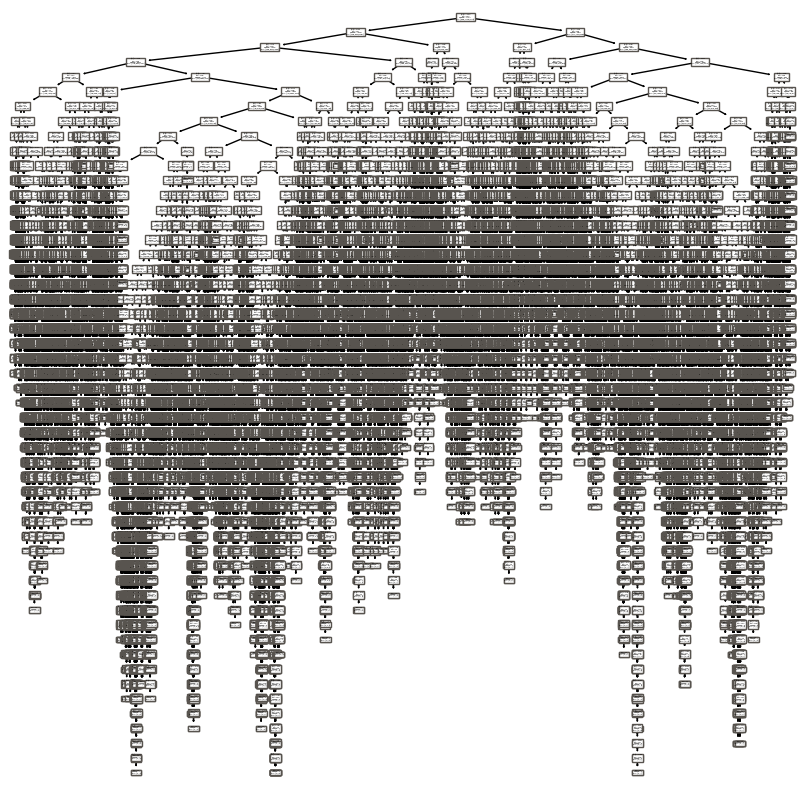

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

tree_clf_3 = tree.DecisionTreeClassifier()
tree_clf_3 = tree_clf_3.fit(training_data_3, training_label_3)

text_representation = tree.export_text(tree_clf_3)
print(text_representation)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(tree_clf_3)

Salvataggio del modello su gdrive

In [ ]:
from joblib import dump, load
dump(tree_clf_3, 'cg_model_tree_clf_3.joblib')
!cp cg_model_tree_clf_3.joblib /content/drive/MyDrive/cg_model_tree_clf_3.joblib

# Percettrone multistrato GRID best estimator

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


parameters = {'solver': ['lbfgs'],
              'max_iter': [100,500,1000,2000,3000],
              'alpha': 10.0 ** -np.arange(1, 5),
              'hidden_layer_sizes':np.arange(5, 10),
              'random_state':[0,1]}

NN_clf_grid_3 = GridSearchCV(MLPClassifier(),
                           parameters,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=10)

NN_clf_grid_3.fit(training_data_3, training_label_3)
NN_clf_3 = NN_clf_grid_3.best_estimator_
NN_clf_3 = NN_clf_3.fit(training_data_3, training_label_3)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Salvataggio del modello su gdrive

In [ ]:
from joblib import dump, load
dump(NN_clf_3, 'cg_model_NN_clf_3.joblib')
!cp cg_model_NN_clf_3.joblib /content/drive/MyDrive/cg_model_NN_clf_3.joblib

# KNN i vicini più vicini

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_clf_3 = knn.fit(training_data_3, training_label_3)

Salvataggio del modello su gdrive

In [ ]:
from joblib import dump, load
dump(knn_clf_3, 'cg_model_knn_clf_3.joblib')
!cp cg_model_knn_clf_3.joblib /content/drive/MyDrive/cg_model_knn_clf_3.joblib

# Algoritmo di voting caricato da file serializzato

In [ ]:
from joblib import dump, load

tree_clf_3 = load('/content/drive/MyDrive/cg_model_tree_clf_3.joblib')
NN_clf_3 = load('/content/drive/MyDrive/cg_model_NN_clf_3.joblib')
knn_clf_3 = load('/content/drive/MyDrive/cg_model_knn_clf_3.joblib')

from sklearn.ensemble import VotingClassifier

voting_clf_3 = VotingClassifier(
    estimators=[('lr', tree_clf_3), ('rf', NN_clf_3), ('knn',knn_clf_3)],
    voting='hard')

voting_clf_3 = voting_clf_3.fit(training_data_3, training_label_3)

Salvataggio del modello su gdrive

In [ ]:
from joblib import dump, load
dump(voting_clf_3, 'cg_model_voting_clf_3.joblib')
!cp cg_model_voting_clf_3.joblib /content/drive/MyDrive/cg_model_voting_clf_3.joblib

# Valutazione del modello

In [ ]:
voting_clf_3 = load('/content/drive/MyDrive/cg_model_voting_clf_3.joblib')

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

print(cross_val_score(voting_clf_3,test_data_3,test_label_3,cv=3, scoring="accuracy"))

y_train_pred_voting_3=cross_val_predict(voting_clf_3,test_data_3,test_label_3,cv=3)
conf_mx_tree_3 = confusion_matrix(test_label_3,y_train_pred_voting_3)
print(conf_mx_tree_3)

[0.73540777 0.73947529 0.74428852]
[[  266  1275   471]
 [  263 26889  3254]
 [  260  6023  5552]]


# Salvare e caricare il modello

In [ ]:
from joblib import dump, load
dump(voting_clf_3, 'cg_model_D4.joblib')
!cp cg_model_D4.joblib /content/drive/MyDrive/cg_model_D4.joblib

In [ ]:
dump(scaler, 'cg_scaler_D4.joblib')
!cp cg_scaler_D4.joblib /content/drive/MyDrive/cg_scaler_D4.joblib

Per utilizzare il modello è necessario ricaricare il decisore addestrato sul clustering

In [ ]:
from google.colab import files
files.download('cg_model_D4.joblib')
files.download('cg_scaler_D4.joblib')
files.download('SWEETVIZ_REPORT.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['codice_comune_cat'] = label_encoder.fit_transform(df['codice_comune_cat'])
print(list(label_encoder.classes_))
df['azienda_codice_cat'] = label_encoder.fit_transform(df['azienda_codice'])
print(list(label_encoder.classes_))
df['committente_codice_cat'] = label_encoder.fit_transform(df['committente_codice'])
print(list(label_encoder.classes_))
df['tp_profilo_cat'] = label_encoder.fit_transform(df['tp_profilo'])
print(list(label_encoder.classes_))
df['tp_intervento_cat'] = label_encoder.fit_transform(df['tp_intervento'])
print(list(label_encoder.classes_))
df['prodotto_cat'] = label_encoder.fit_transform(df['prodotto'])
print(list(label_encoder.classes_))
df['livello_cat'] = label_encoder.fit_transform(df['livello'])
print(list(label_encoder.classes_))
df['tipo_soggetto_cat'] = label_encoder.fit_transform(df['tipo_soggetto'])
print(list(label_encoder.classes_))
df['sesso_cat'] = label_encoder.fit_transform(df['sesso'])
print(list(label_encoder.classes_))
df['tipo_societa_cat'] = label_encoder.fit_transform(df['tipo_societa'])
print(list(label_encoder.classes_))
df['profilo_esattore_cat'] = label_encoder.fit_transform(df['profilo_esattore'])
print(list(label_encoder.classes_))


st = [[30, True, 26, 26, 3, 0, False, 26231.04408, 1932030.0, 2, 375, 1, 2, 0, 2, 11, 31, 2, 2, 6, 2]]

scaler_d3 = load('cg_scaler_D4.joblib')
st = scaler_d3.transform(st)

predict_clf = load('cg_model_D4.joblib')
val = predict_clf.predict(st)[0]

print(val)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

Per utilizzare il modello all'interno di un servizio REST in FLASK, si suggerisce di installare la versione di scikitlearn 1.0.2

`pip install scikit-learn==1.0.2`

All'interno dell'applicazione FLASK inserire il seguente codice di esempio:



```
import flask
from flask import request, jsonify
from joblib import dump, load

app = flask.Flask(__name__)

@app.route('/', methods=['GET'])
def home():
    x1 =  request.args.get('x1')
    x2 =  request.args.get('x2')
    x3 =  request.args.get('x3')
    x4 =  request.args.get('x4')
    x5 =  request.args.get('x5')
    x6 =  request.args.get('x6')
    x7 =  request.args.get('x7')
    x8 =  request.args.get('x8')
    x9 =  request.args.get('x9')
    x10 = request.args.get('x10')
    x11 = request.args.get('x11')
    x12 = request.args.get('x12')
    x13 = request.args.get('x13')
    x14 = request.args.get('x14')
    x15 = request.args.get('x15')
    x16 = request.args.get('x16')
    x17 = request.args.get('x17')
    x18 = request.args.get('x18')
    x19 = request.args.get('x19')
    x20 = request.args.get('x20')
    x21 = request.args.get('x21')

    st = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, X19, x20, x21]

    scaler_d3 = load('cg_scaler_D3.joblib')
    st = scaler_d3.transform(st)

    predict_clf_D3 = load('cg_model_D3.joblib')

    val = predict_clf_D3.predict(st)[0]

    return jsonify(val)

app.run()
```


